El formato de entrega será subir a u-cursos un Jupyter notebook laboratorio6.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y el notebook debe estar escrito en forma de informe técnico, escribiendo una celda markdown antes de cada celda de código. **Recuerde escribir el nombre de todos los integrantes que trabajaron en la elaboración del entregable**.





**Integrantes**:
1. Jorge Herrera
2. Fabián Leal
3. Angie Villamil

# Laboratorio 6: Regresión

Objetivos:



1.  Entender en qué casos se puede utilizar regresión
2.  Conocer y aplicar modelos de regresión y métricas asociadas
3.  Entender overfitting, cómo corregirlo y necesidad de validar un modelo





# 1. Regresión

In [0]:
class Modelo:
  # Definimos la clase modelo, para después poder tener una variable que sea una instancia de éste.
  # Algunos modelos requieren iniciar ciertos parámetros, ésta es una forma de hacerlo.

    def Fit(X,Y):
      # Ajusta los pesos, o parámetros que posea el modelo.
      # Esta es la función que "entrena" al modelo, dependiendo de cuál se haya elegido y la cantidad de datos puede tomar mucho tiempo.
    
    def Predict(X):
      # Una vez que tenemos entrenado un modelo, usualmente queremos hacer predicciones, para este caso
      # entregamos el vector de variables, y nos retorna un vector con los valores predichos para cada observación.
      return predictions

# 2. Métricas

In [0]:
x=[1, 2, 3]
y=[3, 4, 5]

## Mean Absolute Error (MAE)



\begin{equation}
 MAE=  \frac{1}{n} \sum_{i}^{n} | x_{i} - y_{i} |
\end{equation}

In [0]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(x,y)

2.0

# Root Mean Squared Error (RMSE)

\begin{equation}
 RMSE =  \sqrt{ \frac{1}{n} \sum_{i}^{n}  (x_{i} - y_{i}) ^{2} } 
\end{equation}

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x,y)

4.0

# 3. Ejemplo

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!wget https://raw.githubusercontent.com/Camiloez/Labs-Data-Mining/master/data.csv
!mv data.csv ejemplo.csv
df=pd.read_csv('ejemplo.csv')

--2018-11-29 21:46:30--  https://raw.githubusercontent.com/Camiloez/Labs-Data-Mining/master/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10223 (10.0K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   9.98K  --.-KB/s    in 0s      

2018-11-29 21:46:30 (47.0 MB/s) - ‘data.csv’ saved [10223/10223]



In [0]:
df=df.dropna()
df.head(5)

,CustomerID,State,Area Code,Address,Phone,Age,Genre,Education,Annual Income (k$),Expenses,Spending Score (1-100),Club Member
0,1,KS,415,2.0,382-4657,19,Male,2.0,15,-,39,no
1,2,OH,415,17.0,371-7191,21,Male,3.0,15,-,81,no
2,3,NJ,415,12.0,358-1921,20,Female,1.0,16,-,6,no
3,4,OH,408,3.0,375-9999,23,Female,1.0,16,299.4,77,yes
4,5,OK,415,2.0,330-6626,31,Female,1.0,17,166.7,40,yes


In [0]:
x=df.iloc[:,5:10]
del x['Genre']
del x['Expenses']
x.head(5)



,Age,Education,Annual Income (k$)
0,19,2.0,15
1,21,3.0,15
2,20,1.0,16
3,23,1.0,16
4,31,1.0,17


In [0]:
y=df.iloc[:,10]
y.head(5)

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

### Separación 80% datos entrenamiento y 20% datos de test.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

96
96
24
24


,Age,Education,Annual Income (k$)
71,47,1.0,49
16,35,2.0,21
20,35,2.0,24
192,33,2.0,113
133,31,2.0,72
165,36,2.0,85
36,42,3.0,34
136,44,1.0,73
32,53,1.0,33
164,50,1.0,85


## Entrenar modelos sobre los conjuntos train y test

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


# Modelos
models = []
models.append(LinearRegression())
models.append(KNeighborsRegressor())
models.append(DecisionTreeRegressor())
models.append(RandomForestRegressor(random_state=10))
models.append(SVR())
#Names
names=[]
names.append('Reg Lineal')
names.append('KNN')
names.append('D Tree')
names.append('Random Forest')
names.append('SVM')


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



train_MAE=[]
train_RMSE=[]
test_MAE=[]
test_RMSE=[]

for model in models:
  #Ajuste
  model.fit(X_train, y_train)
  
  # Train predict
  y_pred=model.predict(X_train)  
  #Métricas
  RMSE=np.sqrt(mean_squared_error(y_train, y_pred))
  MAE=mean_absolute_error(y_train, y_pred)
  
  
  train_MAE.append(MAE)
  train_RMSE.append(RMSE)
  
  
  #Test predict
  y_pred=model.predict(X_test) 
  #Métricas
  RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
  MAE=mean_absolute_error(y_test, y_pred)
  
  test_MAE.append(MAE)
  test_RMSE.append(RMSE)
  

In [0]:
test_RMSE

[21.563591880849827,
 16.429597276460147,
 18.05547008526779,
 16.957913590218975,
 22.13910912096838]

## Métricas Train v/s Test por Modelo

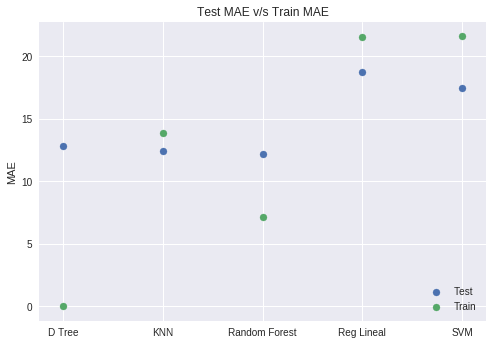

In [0]:
plt.scatter(names, test_MAE, label='Test')
plt.scatter(names, train_MAE, label='Train')
plt.legend(loc='lower right')
plt.title('Test MAE v/s Train MAE')
plt.ylabel('MAE')
plt.show()

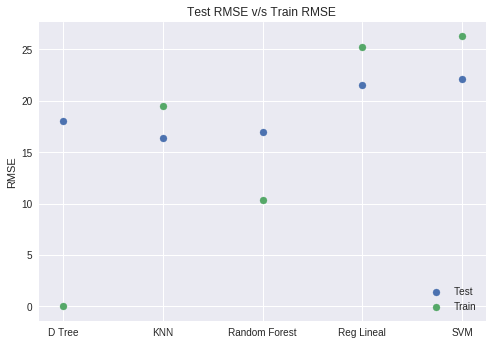

In [0]:
plt.scatter(names, test_RMSE, label='Test')
plt.scatter(names, train_RMSE, label='Train')
plt.legend(loc='lower right')
plt.title('Test RMSE v/s Train RMSE ')
plt.ylabel('RMSE')
plt.show()

# Investigación (2 ptos)

Responda 2 de 3 preguntas, si contesta todas se elegirán las mejores.

1. Explique qué es la regularización, y cuál es su utilidad. ¿Es este un método *filter, wrapper o embedded*?
2. Investigue las siguientes métricas:  *mean squared error (MSE), Median absolute error (MedAE), Mean squared logarithmic error (MSLE)*. Describa al menos un caso por cada métrica en que se recomiende el uso de ésta.
3. Frente a una base de datos con gran cantidad de outliers, ¿Qué métrica posee más sensibilidad, MAE o RMSE? Justifique.



#1.


#2. 
Dado $Y$ el vector de los valores observados de la variable de interes y $\hat{Y}$ el vector de predicciones de la variable de interes

##Mean squared error (MSE):
 el MSE se define como: 
$$MSE=\frac{1}{n}\sum\limits_{i=1}^{n}(Y_i-\hat{Y}_i)^2$$
Esta medida se usa cuando la variable no tiene tantos valores outliers, debido a que no es una medida robusta.
##Median absolute error (MedAE):

$$MedAE=median(|Y_1-\hat{Y}_1|,...,|Y_n-\hat{Y}_n|)$$

Estra medida se usa para evitar sesgo debido a que es robusta a valores atipicos.

##Mean squared logarithmic error (MSLE):

$$ MSLE=\frac{1}{n}\sum\limits_{i=0}^{n-1}(ln(1+Y_i)-ln(1+\hat{Y}_i))^2$$

Esta metrica se usa en especial cuando la variable tiene un crecimiento exponencial como poblaciones.

#3. 
La metrica de Root Mean Square Error (RMSE) es mas sensible a los outliers, debido a que el promedio es una operación lineal, por lo tanto, al calcular el promedio de unos datos elevados al cuadrado (RMSE), este se vera mas afectado y sesgado que cuando los valores no estan elevados al cuadrado (MAE).
 

Bibliografía: \\

https://scikit-learn.org/stable/modules/model_evaluation.html 

# Laboratorio (4 ptos)


Considere el problema que enfrenta una empresa de inversión inmobiliaria, cuyo fin es predecir el valor promedio de una casa en un distrito y poder definir donde invertir para maximizar sus ganancias.

Para lo anterior cuenta con los siguientes datos:


1.   Datos geográficos: latitud y longitud.
2.   Datos asociados a personas: cuánta gente vive en un distrito, ingreso promedio, edad promedio de los habitantes.
3. Datos asociados a hogares: cantidad de piezas, valor medio de una casa en un distrito, cantidad de hogares en un distrito.
















**Tareas:**


1.   Realice un análisis exploratorio de los datos y muestre al menos 2 gráficos de variables que considere relevantes para el análisis.  Justifique las variables que usará en la regresión. Por último, divida sus datos en conjunto entrenamiento y prueba (**1 pto**)
2. Implemente al menos 3 modelos de regresión,  y reporte al menos 2 métricas para cada uno, justifique las métricas elegidas. En caso de observar *overfitting* o *underfitting* mencione por qué cree que sucede. Concluya qué modelo es mejor y justifique (**hint: ** No necesariamente es el que tenga mejor métrica de precisión). (**2 ptos**) 
3. Seleccione uno de los modelos y aplíquelo en la base de datos de VALIDACION. Debe entregar un archivo .xlsx con la predicción realizada. (**1 pto**)

(**BONUS - 1.0 pto**) Repita el paso 2 con validación cruzada ¿se mantiene su decisión respecto al modelo escogido? En caso de no ser así, justifique.




# Importar Librerías

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Descargar datos y leerlos en un Data Frame

In [0]:
#Descarga de datos
!wget https://raw.githubusercontent.com/Camiloez/Labs/master/data.csv
#Lectura en dataframe
df=pd.read_csv('data.csv')

--2018-12-03 00:36:45--  https://raw.githubusercontent.com/Camiloez/Labs/master/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1706430 (1.6M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.63M  --.-KB/s    in 0.05s   

2018-12-03 00:36:45 (31.6 MB/s) - ‘data.csv’ saved [1706430/1706430]



In [0]:
!ls

data.csv  sample_data


In [0]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


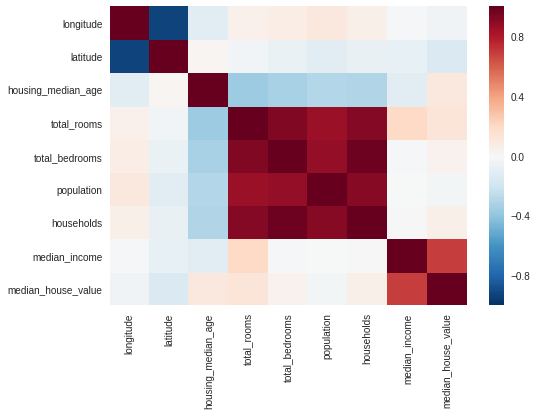

In [0]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

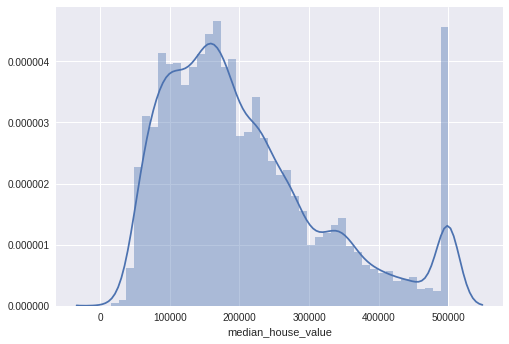

In [0]:
sns.distplot(df['median_house_value'])

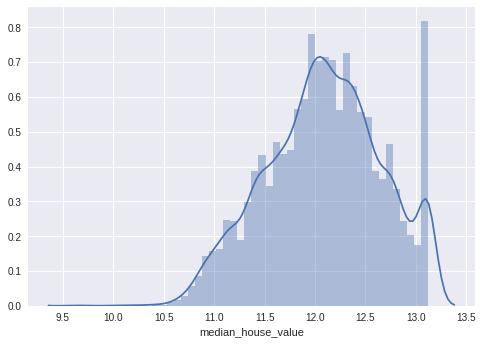

In [0]:
import numpy as np
sns.distplot(np.log(1 + df['median_house_value']))

Se eliminan las variables* total_rooms*,* total_bedrooms*, y * population* , por la multicolinealidad que se aprecia entre estas y la variable *households* al mirar el gráfico de correlaciones, dejando solamente esta última en el modelo. Dada la alta correlación entre estas (mayor a 0.8), casi no se pierde capacidad explicativa al eliminar estas variables.

In [0]:
x=df.iloc[:,0:8]
del x['total_rooms']
del x['total_bedrooms']
del x['population']
x.head(5)

,longitude,latitude,housing_median_age,households,median_income
0,-114.31,34.19,15.0,472.0,1.4936
1,-114.47,34.40,19.0,463.0,1.8200
2,-114.56,33.69,17.0,117.0,1.6509
3,-114.57,33.64,14.0,226.0,3.1917
4,-114.57,33.57,20.0,262.0,1.9250


In [0]:
y=df.iloc[:,8]
#y=np.log(y_pre)
y.head(5)

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

13600
13600
3400
3400


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


# Modelos
models = []
models.append(LinearRegression())
models.append(KNeighborsRegressor())
models.append(DecisionTreeRegressor())
models.append(RandomForestRegressor(random_state=10))
models.append(SVR())
#Names
names=[]
names.append('Reg Lineal')
names.append('KNN')
names.append('D Tree')
names.append('Random Forest')
names.append('SVM')

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_MAE=[]
train_RMSE=[]
test_MAE=[]
test_RMSE=[]

for model in models:
  #Ajuste
  model.fit(X_train, y_train)
  
  # Train predict
  y_pred=model.predict(X_train)  
  #Métricas
  RMSE=np.sqrt(mean_squared_error(y_train, y_pred))
  MAE=mean_absolute_error(y_train, y_pred)
  
  
  train_MAE.append(MAE)
  train_RMSE.append(RMSE)
  
  
  #Test predict
  y_pred=model.predict(X_test) 
  #Métricas
  RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
  MAE=mean_absolute_error(y_test, y_pred)
  
  test_MAE.append(MAE)
  test_RMSE.append(RMSE)

Se utilizan las métricas MAE y RMSE para evaluar los modelos. En el caso del RMSE, al elevar los errores al cuadrado antes de promediarlos, se penaliza demasiado por errores más grandes. Es por esto que se complementa el análisis con el MAE, para controlar el efecto anterior. Como se ve a continuación, ambos test arrojan los mejore resultados para el mismo modelo (*Random Forest*) 

In [0]:
test_MAE

[53448.5657358641,
 76252.55929411764,
 43075.22794117647,
 34219.04782352941,
 90709.10808966066]

In [0]:
test_RMSE

[72386.7098683895,
 99988.55728373051,
 66755.02073247111,
 52147.63449912791,
 121224.15307525262]

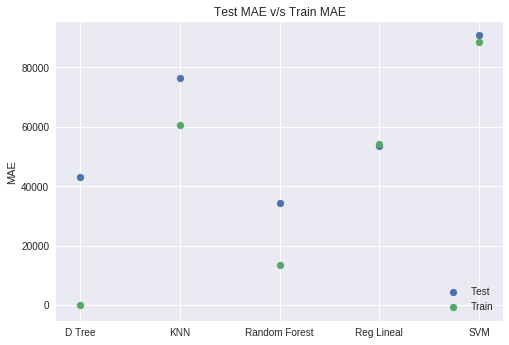

In [0]:
plt.scatter(names, test_MAE, label='Test')
plt.scatter(names, train_MAE, label='Train')
plt.legend(loc='lower right')
plt.title('Test MAE v/s Train MAE')
plt.ylabel('MAE')
plt.show()

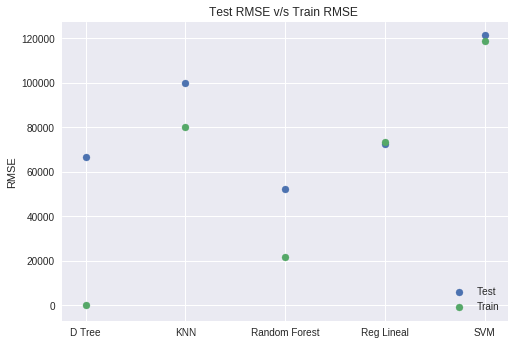

In [0]:
plt.scatter(names, test_RMSE, label='Test')
plt.scatter(names, train_RMSE, label='Train')
plt.legend(loc='lower right')
plt.title('Test RMSE v/s Train RMSE ')
plt.ylabel('RMSE')
plt.show()

## Validación

In [0]:
#Descarga de datos
!wget https://raw.githubusercontent.com/Camiloez/Labs/master/validacion.csv
#Lectura en dataframe
df=pd.read_csv('validacion.csv')

--2018-11-22 01:59:36--  https://raw.githubusercontent.com/Camiloez/Labs/master/validacion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129159 (126K) [text/plain]
Saving to: ‘validacion.csv’

validacion.csv      100%[===================>] 126.13K  --.-KB/s    in 0.02s   

2018-11-22 01:59:36 (5.85 MB/s) - ‘validacion.csv’ saved [129159/129159]



In [0]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27,3885,661,1537,606,6.6085,NaN
1,-118.30,34.26,43,1510,310,809,277,3.5990,NaN
2,-117.81,33.78,27,3589,507,1484,495,5.7934,NaN
3,-118.36,33.82,28,67,15,49,11,6.1359,NaN
4,-119.67,36.33,19,1241,244,850,237,2.9375,NaN


In [0]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,0.0
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,NaN
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,NaN
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,NaN
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,NaN
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,NaN
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,NaN
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,NaN
